In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
input_data = pd.read_csv('../Dataset/train.csv')

In [3]:
input_data.columns
input_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
input_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

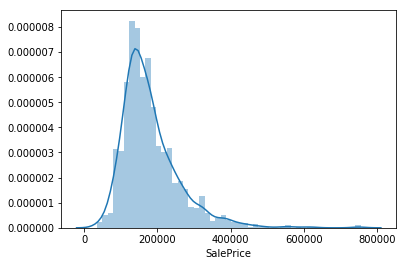

In [5]:
sns.distplot(input_data['SalePrice'])

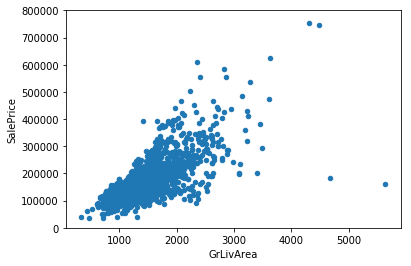

In [6]:
var= 'GrLivArea'
plot = pd.concat([input_data['SalePrice'],input_data[var]],axis=1)
plot.plot.scatter(x=var,y='SalePrice',ylim=(0,800000));


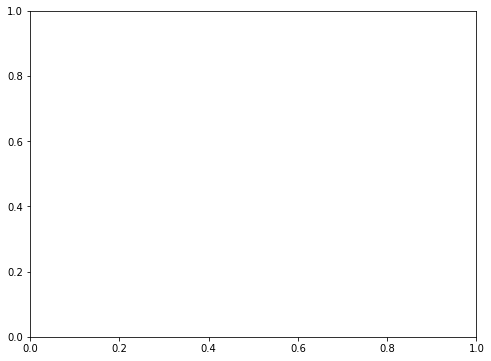

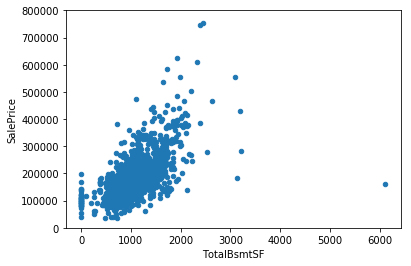

In [7]:
var= 'TotalBsmtSF'
plot = pd.concat([input_data['SalePrice'],input_data[var]],axis=1)
f,ax = plt.subplots(figsize=(8,6))
plot.plot.scatter(x=var,y='SalePrice',ylim=(0,800000));


(-0.5, 9.5, 0, 800000)

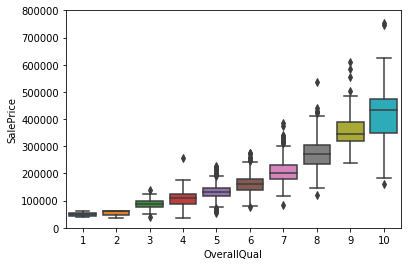

In [8]:
var= 'OverallQual'
plot = pd.concat([input_data['SalePrice'],input_data[var]],axis=1)
fig = sns.boxplot(x=var, y='SalePrice',data=plot)
fig.axis(ymin=0,ymax=800000)



(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

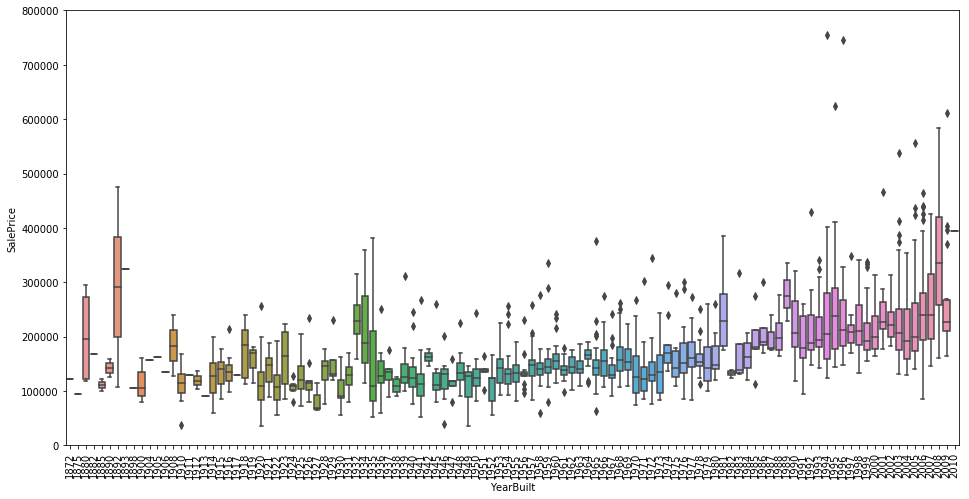

In [9]:
var= 'YearBuilt'
plot = pd.concat([input_data['SalePrice'],input_data[var]],axis=1)
f,ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='SalePrice',data=plot)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90)

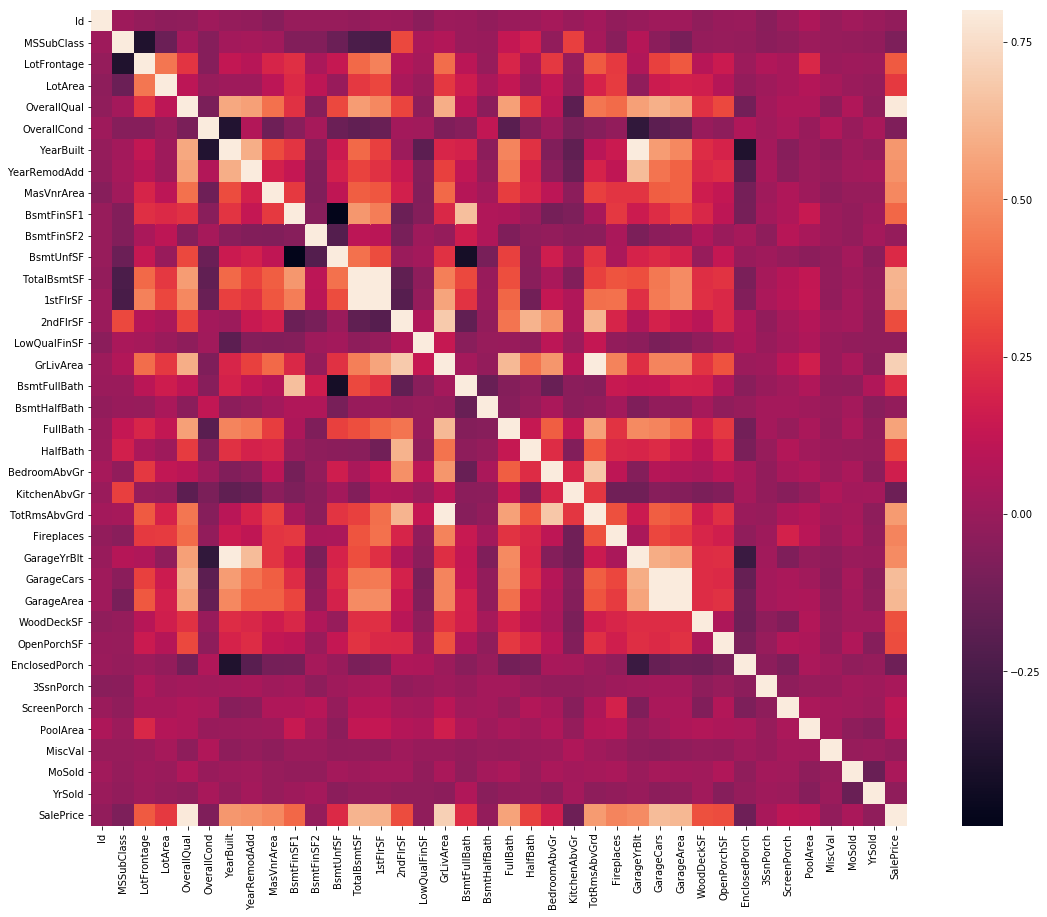

In [10]:
cormat= input_data.corr()
f,ax = plt.subplots(figsize=(20,15))
sns.heatmap(cormat,vmax=0.8,square=True)

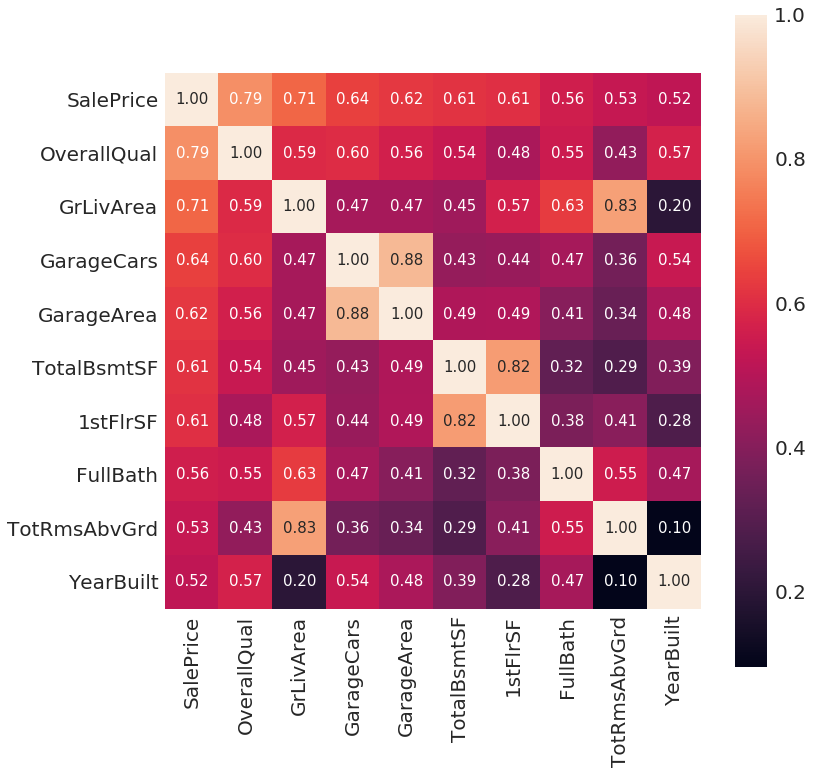

In [11]:
k =10
cols = cormat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(input_data[cols].values.T)
sns.set(font_scale=2)
f,ax = plt.subplots(figsize=(12,12))
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols.values,
                xticklabels=cols.values)

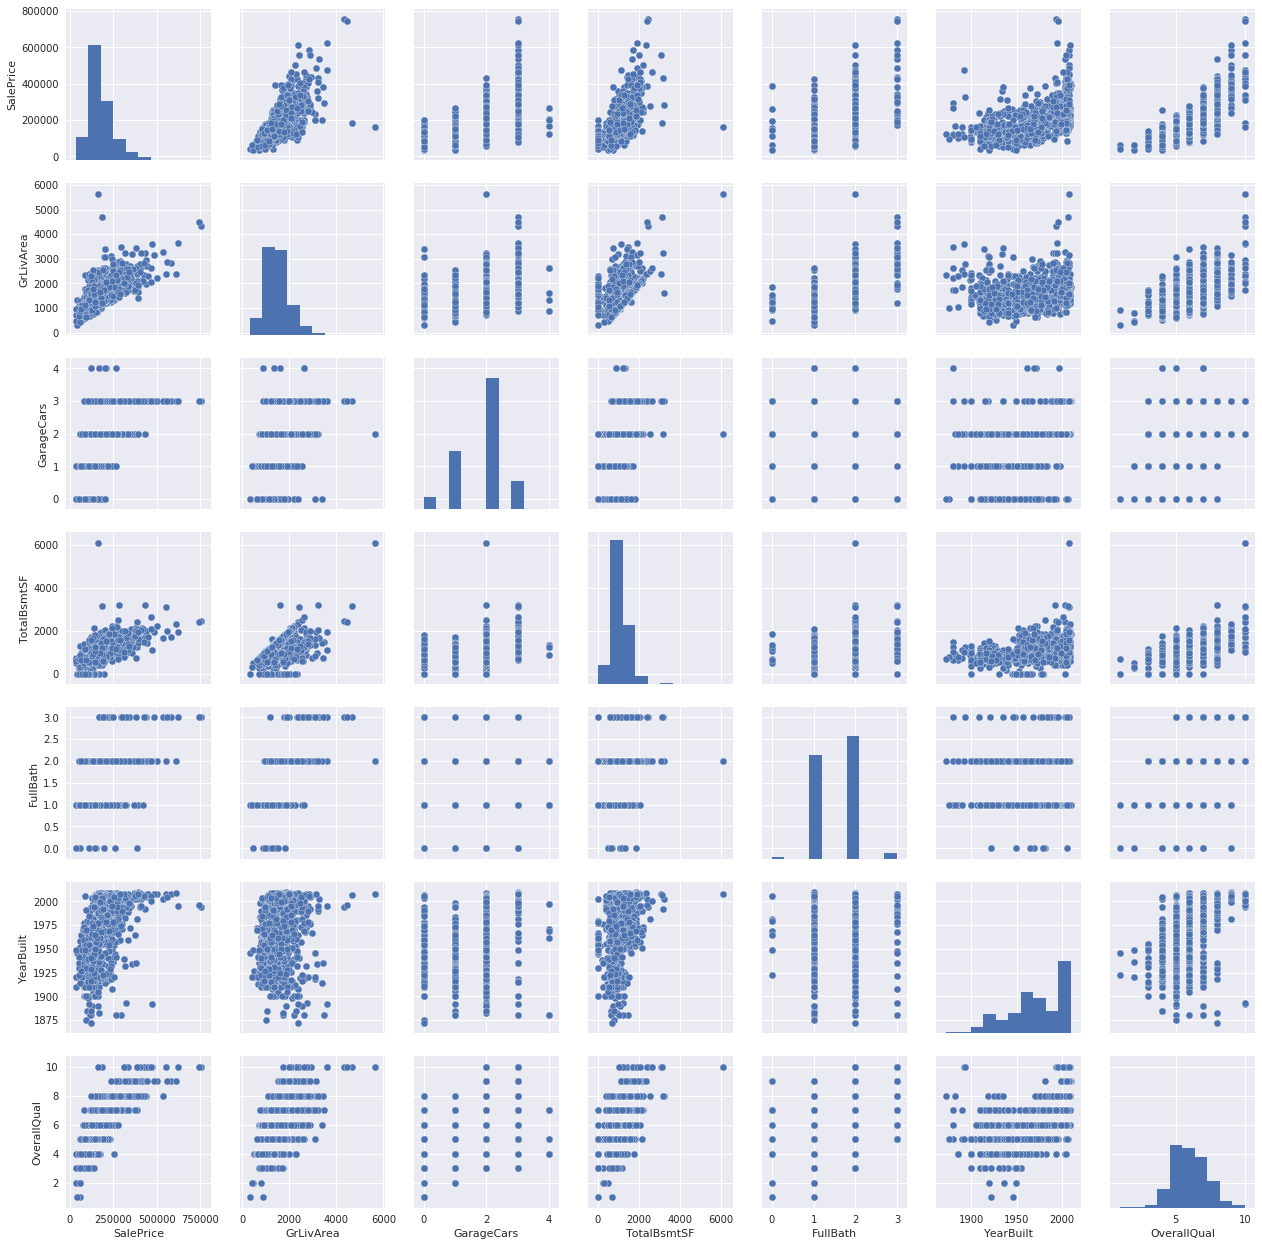

In [12]:
sns.set()
cols = ['SalePrice','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt','OverallQual']
sns.pairplot(input_data[cols],size=2.5)
plt.show();

In [13]:
total = input_data.isnull().sum().sort_values(ascending=False)
percent = (input_data.isnull().sum()/input_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [14]:
input_data = input_data.drop(input_data.loc[input_data['Electrical'].isnull()].index)

In [15]:
input_data = input_data.drop((missing_data[missing_data['Total']>1]).index,1)
cols = input_data.columns
print(cols)
input_data.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
input_data.isnull().sum().max()

0

In [17]:
saleprice_scaled = StandardScaler().fit_transform(input_data['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print("outer (low) range of the distribution:")
print(low_range)
print("\nouter (higher) range of distribution")

print(high_range)

outer (low) range of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer (higher) range of distribution
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


In [18]:
input_data.sort_values(by= 'GrLivArea',ascending = False)[:2]
input_data = input_data.drop(input_data[input_data['Id'] == 1299].index)
input_data = input_data.drop(input_data[input_data['Id'] == 524].index)

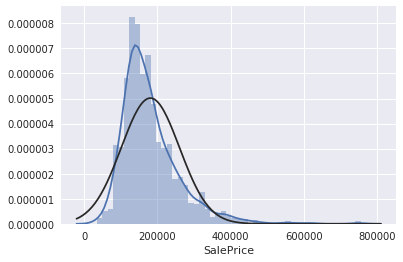

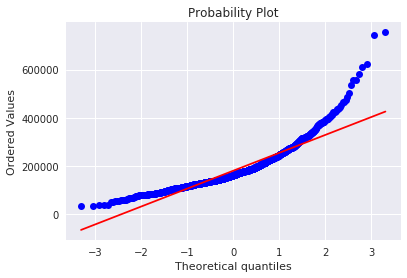

In [19]:
sns.distplot(input_data['SalePrice'],fit = norm)
fig = plt.figure()
res = stats.probplot(input_data['SalePrice'],plot = plt)

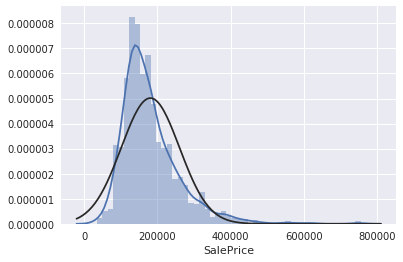

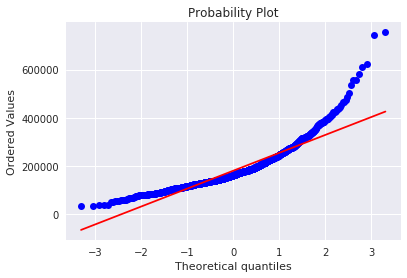

In [20]:
sns.distplot(input_data['SalePrice'],fit = norm)
fig = plt.figure()
res = stats.probplot(input_data['SalePrice'],plot = plt)


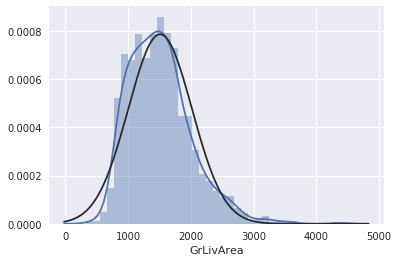

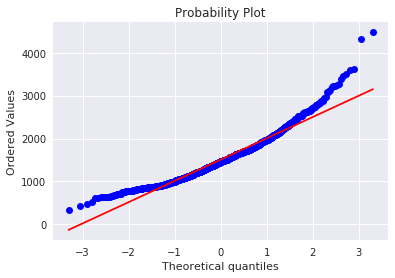

In [21]:
sns.distplot(input_data['GrLivArea'],fit = norm)
fig = plt.figure()
res = stats.probplot(input_data['GrLivArea'],plot = plt)

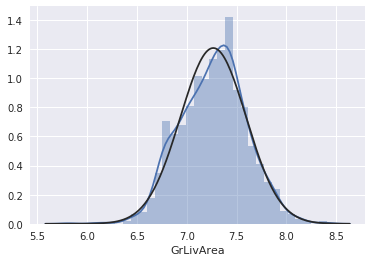

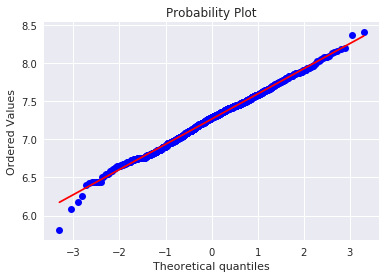

In [22]:
input_data['GrLivArea'] = np.log(input_data['GrLivArea'])
sns.distplot(input_data['GrLivArea'],fit = norm)
fig = plt.figure()
res = stats.probplot(input_data['GrLivArea'],plot = plt)


In [23]:
input_data['HasBsmt'] =  pd.Series(len(input_data['TotalBsmtSF']),index = input_data.index)
input_data['HasBsmt'] = 0
input_data.loc[input_data['TotalBsmtSF']>0,'HasBsmt']=1

In [24]:
input_data.loc[input_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(input_data['TotalBsmtSF'])

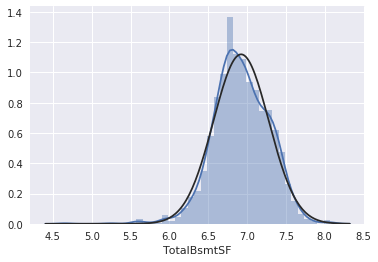

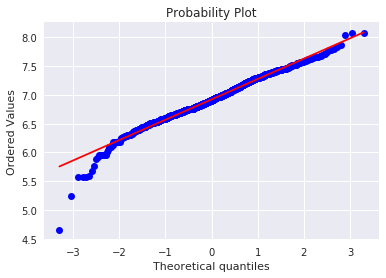

In [25]:
sns.distplot(input_data[input_data['TotalBsmtSF']>0]['TotalBsmtSF'],fit = norm)
fig = plt.figure()
res = stats.probplot(input_data[input_data['TotalBsmtSF']>0]['TotalBsmtSF'],plot = plt)

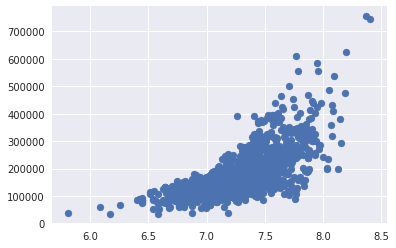

In [26]:
plt.scatter(input_data['GrLivArea'],input_data['SalePrice']);

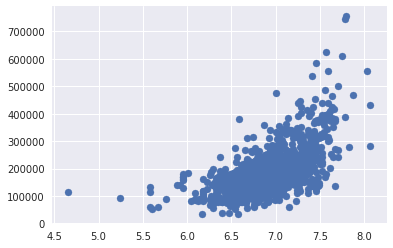

In [27]:
plt.scatter(input_data[input_data['TotalBsmtSF']>0]['TotalBsmtSF'],
            input_data[input_data['TotalBsmtSF']>0]['SalePrice'])

In [28]:
from sklearn.linear_model import LinearRegression


In [29]:
y_data = input_data['SalePrice'].values
x_data = input_data.drop(['SalePrice','Id'],axis=1)

In [30]:
x_numeric = x_data.select_dtypes(exclude=['object'])
x_text = x_data.select_dtypes(include = ['object'])

from sklearn.preprocessing import Imputer

def impute_df(DF):
    imputer = Imputer()
    columns = DF.columns
    index = DF.index
    DF_imputed = pd.DataFrame(imputer.fit_transform(DF))
    DF_imputed.columns = DF.columns
    DF_imputed.index = DF.index
    return DF_imputed

x_imputed = impute_df(x_numeric)
x_imputed.isnull().any()

max_cardinality = 10
high_card_cols = [col for col in x_text.columns if x_text[col].nunique()> max_cardinality]
print(high_card_cols)


['Neighborhood', 'Exterior1st', 'Exterior2nd']


In [31]:
x_text = x_text.drop(high_card_cols,axis=1)
x_text = pd.get_dummies(x_text)
x_train = pd.concat([x_imputed,x_text],axis=1)
x_train.isnull().sum().max()

0

In [32]:
linreg = LinearRegression()

In [33]:
from sklearn import metrics
print(y_data.shape)
print(x_train.shape)

(1457,)
(1457, 164)


In [34]:
linreg.fit(x_train,y_data)
y_pred = linreg.predict(x_train)
print(np.sqrt(metrics.mean_squared_error(y_pred,y_data)))

21889.0114264


In [35]:
test_data = pd.read_csv('../Dataset/test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [36]:
test_numeric = test_data.select_dtypes(exclude=['object'])
test_text = test_data.select_dtypes(include=['object'])

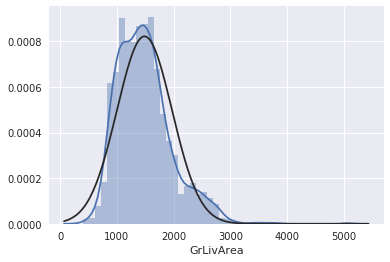

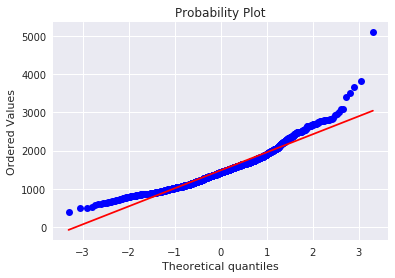

In [37]:
test_imputed = impute_df(test_numeric)
sns.distplot(test_imputed['GrLivArea'],fit = norm)
fig = plt.figure()
res = stats.probplot(test_imputed['GrLivArea'],plot = plt)

In [38]:
test_imputed['GrLivArea'] = np.log(test_imputed['GrLivArea'])

In [39]:
high_card_cols = [col for col in test_text.columns if test_text[col].nunique() > max_cardinality]
test_text = test_text.drop(high_card_cols,axis=1)
test_text = pd.get_dummies(test_text)
test_data = pd.concat([test_imputed,test_text],axis=1)

In [40]:
test_data.shape

(1459, 218)

In [41]:
test_data.isnull().sum().max()

0

In [42]:
test_data['HasBsmt'] =  pd.Series(len(test_data['TotalBsmtSF']),index = test_data.index)
test_data['HasBsmt'] = 0
test_data.loc[test_data['TotalBsmtSF']>0,'HasBsmt']=1

In [43]:
test_data.loc[test_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(test_data['TotalBsmtSF'])

In [44]:
test_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HasBsmt
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,0,0,1,0,0,0,0,1,0,1
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,0,0,1,0,0,0,0,1,0,1
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,0,0,1,0,0,0,0,1,0,1
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,0,0,1,0,0,0,0,1,0,1
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,0,0,1,0,0,0,0,1,0,1


In [45]:
test_data.isnull().sum().max()

0

In [46]:
final_train,final_test = x_train.align(test_data,join = 'inner',axis =1)

In [47]:
print(final_train.shape)
print(final_test.shape)

(1457, 153)
(1459, 153)


In [48]:
linreg.fit(final_train,y_data)
y_pred = linreg.predict(final_test)

In [49]:
for i in range(0,len(y_pred)):
    if y_pred[i]<=0:
        y_pred[i] = y_pred[i]*(-1)
        print(y_pred[i])
my_sol = pd.DataFrame({'Id':range(1461,2920),'SalePrice':y_pred})
my_sol.to_csv('../Submissions/submission1.csv',index=False)

550.657662665
958.684561088


In [52]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=500,learning_rate=0.5)


In [53]:
from math import log,sqrt
def metric(a,b):
    b = b.get_label()
    RMSLE = sqrt(metrics.mean_squared_log_error(a,b))
    return("RMSLE",RMSLE)

In [66]:
from sklearn.model_selection import train_test_split

def get_nestimators(x,y):
    x1,x2,y1,y2=train_test_split(x,y,test_size=0.2)
    my_model.fit(x1,y1,eval_set=[(x2,y2)],eval_metric=metric,verbose=False,early_stopping_rounds=10)
    return my_model.best_iteration

my_model.n_estimators = get_nestimators(x_train,y_data)
print(my_model.n_estimators)

25


In [67]:
final_train,final_test = x_train.align(test_data,join = 'left',axis =1)

In [68]:
my_model.fit(x_train,y_data)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.5, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=25, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [69]:
y_pred = my_model.predict(final_test)

for i in range(0,len(y_pred)):
    if y_pred[i]<=0:
        y_pred[i] = y_pred[i]*(-1)
        print(y_pred[i])

my_sol = pd.DataFrame({'Id':range(1461,2920),'SalePrice':y_pred})
my_sol.to_csv('../Submissions/submission4.csv',index=False)